In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# This function display the splits of the tree
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score 

In [3]:
 #df_original = pd.read_csv('customer_churn.csv')
df_original= pd.read_csv('Bank Customer Churn Prediction.csv')

In [4]:
df_original.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df_original['Exited'] = df_original['churn']

In [6]:
df_original.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [7]:
# Check class balance
df_original['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
# Calculate average balance of customerswho churned
avg_churned_bal = df_original[df_original['Exited']==1]['balance'].mean()
avg_churned_bal

91108.53933726068

In [9]:
# Create a new df that drops customerid and gende and churn cols
churn_df= df_original.drop(['customer_id','gender','churn'], axis=1)
churn_df.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Dummy encode country variables
churn_df = pd.get_dummies(churn_df, drop_first = True)
churn_df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Exited,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True


In [11]:
# Split data
y= churn_df['Exited']

X = churn_df.copy() 
X = X.drop('Exited', axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify =y, random_state=42)

In [12]:
# Instaitae the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make prediction on test data
dt_pred = decision_tree.predict(X_test)

In [13]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test,dt_pred))
print("Precision:", "%.3f" % precision_score(y_test,dt_pred))
print("Recall:", "%.3f" % recall_score(y_test,dt_pred))
print("Fi Score:", "%.3f" % f1_score(y_test,dt_pred))

Accuracy: 0.790
Precision: 0.486
Recall: 0.503
Fi Score: 0.494


In [14]:
def conf_matrix_plot(model, X_data, y_data):
    
    # Accept as argument mosel object a data ( test or validate), and y data ( test or validate).
    # Return a plot of confusion matrix for prediction on y data.
    
    model_pred = model.predict(X_data)
    cm = confusion_matrix(y_data, model_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix =cm, 
                               display_labels = model.classes_)
    disp.plot()
    plt.show()

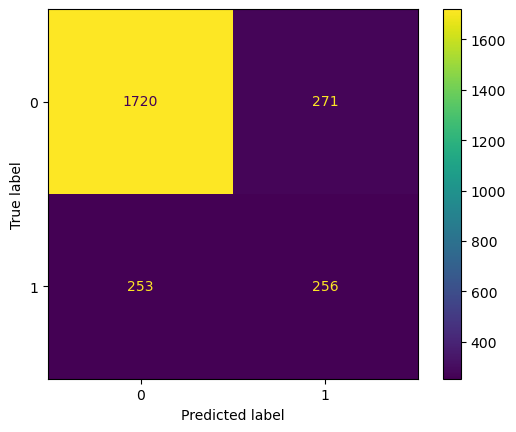

In [15]:
# Generate confusion matrix
conf_matrix_plot(decision_tree, X_test, y_test)

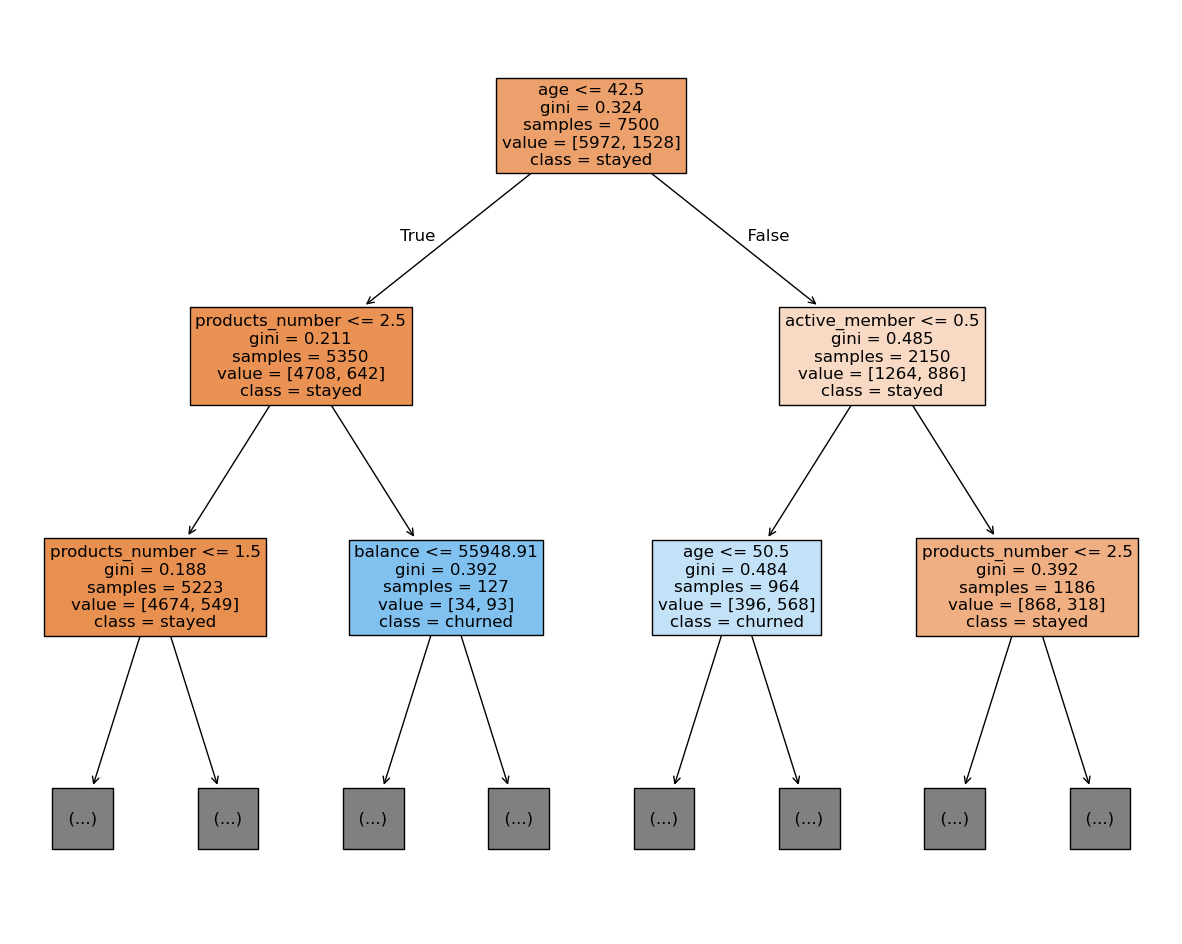

In [17]:
# Plot the tree
plt.figure(figsize = (15,12))
plot_tree(decision_tree, max_depth=2, fontsize = 12, feature_names = X.columns, 
                 class_names ={0:'stayed', 1: 'churned'}, filled = True);
plt.show()

# 💡 What Is This About?
## Your report is trying to answer:

## Which customers are likely to stop using our service?

## This is called churn prediction — and it's very important for businesses. If a company can figure out which customers might leave soon, it can take steps to keep them.

# 🧰 What Did You Use to Find This Out?
## You used:

#### Customer data — things like account balance, age, number of products, etc.

#### A decision tree model — a tool that makes “yes/no” decisions to classify customers as likely to leave or stay.

#### Evaluation metrics — to see how good the model is at predicting churn.

# 📊 What Does the Report Show?
## You built a machine learning model and tested how well it worked using these key measures:

### Metric	What It Means in Simple Terms
 * Accuracy	How many predictions were correct overall.
 * Precision	Of the customers we predicted will leave, how many actually did?
 * Recall	Of all customers who actually left, how many did we correctly predict?
 * F1 Score	A balance between precision and recall.

| Metric        | What It Means in Simple Terms                                          |
| ------------- | ---------------------------------------------------------------------- |
| **Accuracy**  | How many predictions were correct overall.                             |
| **Precision** | Of the customers we predicted will leave, how many actually did?       |
| **Recall**    | Of all customers who actually left, how many did we correctly predict? |
| **F1 Score**  | A balance between precision and recall.                                |


| Model               | F1   | Recall | Precision | Accuracy |
| ------------------- | ---- | ------ | --------- | -------- |
| Tuned Decision Tree | 0.82 | 0.80   | 0.85      | 0.84     |


### In simple terms:

Out of 100 churners, your model caught 80 of them.

When it said someone would leave, it was right 85% of the time.

Overall, it got 84 out of 100 customer predictions right.

That’s a pretty good start for making business decisions.

# ✅ What Can the Business Do With This?
## Now the business can:

* Target customers likely to leave with special offers or calls.

* Understand why people are leaving (maybe through feature importance from the tree).

* Improve customer retention and increase profit.